In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
dataset=pd.read_csv("dummy.csv")

In [3]:
dataset

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
dataset["Attendance"]=dataset['Attendance'].map({'No':0,'Yes':1})

In [5]:
x=dataset[["SAT","Attendance"]]

In [6]:
y=dataset["GPA"]

In [7]:
x

,SAT,Attendance
0,1714,0
1,1664,0
2,1760,0
3,1685,0
4,1693,0
...,...,...
79,1936,1
80,1810,1
81,1987,0
82,1962,1


In [8]:
y.shape

(84,)

In [10]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [11]:
import statsmodels.api as sm

x1=sm.add_constant(x)

In [12]:
x1=sm.add_constant(x)

In [13]:
model=sm.OLS(y,x1).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           2.19e-15
Time:                        01:51:33   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
y_hat_no=0.6439+(0.0014*dataset['SAT'])
y_hat_yes = 0.6439+0.0014*dataset['SAT']+0.2226

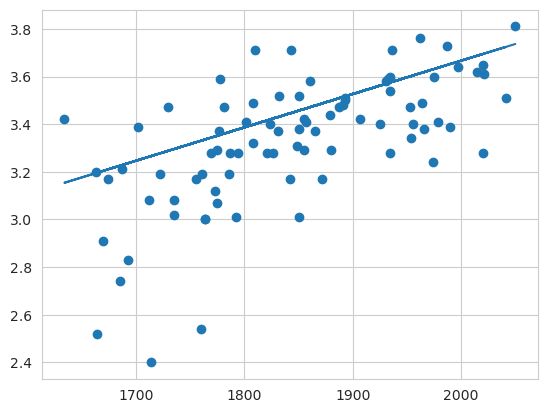

In [27]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_yes)
plt.show()

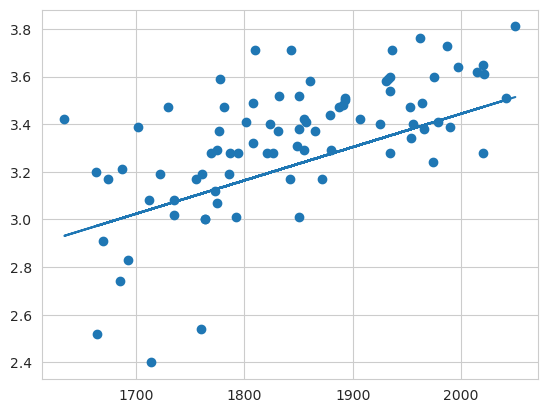

In [28]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_no)
plt.show()